# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [292]:
import pandas as pd
import openpyxl

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [293]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [294]:
df.shape

(81937, 15)

In [295]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

In [296]:
df.columns = df.columns.str.replace(' ', '')

In [297]:
df.dtypes

OwnerZipCode                     int64
AnimalName                      object
AnimalGender                    object
PrimaryBreed                    object
SecondaryBreed                  object
AnimalDominantColor             object
AnimalSecondaryColor            object
AnimalThirdColor                object
AnimalBirth             datetime64[ns]
SpayedorNeut                    object
GuardorTrained                  object
Vaccinated                      object
ApplicationDate         datetime64[ns]
LicenseIssuedDate       datetime64[ns]
LicenseExpiredDate      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [298]:
df.head()

,OwnerZipCode,AnimalName,AnimalGender,PrimaryBreed,SecondaryBreed,AnimalDominantColor,AnimalSecondaryColor,AnimalThirdColor,AnimalBirth,SpayedorNeut,GuardorTrained,Vaccinated,ApplicationDate,LicenseIssuedDate,LicenseExpiredDate
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


Each row is a licensed dog. SpayedorNeut is whether the dog has been spayed or neutered. Vaccinated is whether the dog has been vaccinated.

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

1. How many male trained dogs are there vs female trained dogs?
2. Which dog is the youngest and oldest?
3. How many unvaccinated dogs are there?
4. How many huskies are there (primary or secondary breed)?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [299]:
df.PrimaryBreed.value_counts().head(10)

Unknown                                 12894
Yorkshire Terrier                        5133
Shih Tzu                                 4727
Chihuahua                                3924
Maltese                                  2965
Labrador Retriever                       2872
American Pit Bull Terrier/Pit Bull       2153
American Pit Bull Mix / Pit Bull Mix     2029
Labrador Retriever Crossbreed            1864
Beagle                                   1438
Name: PrimaryBreed, dtype: int64

<AxesSubplot:>

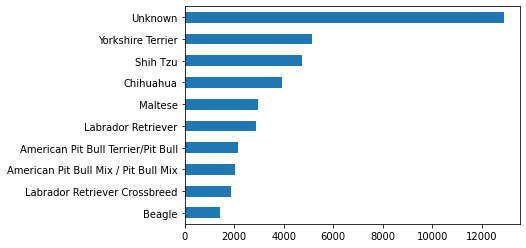

In [300]:
df.PrimaryBreed.value_counts().head(10).sort_values(ascending=True).plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [301]:
df[df.PrimaryBreed != 'Unknown'].PrimaryBreed.value_counts().head(10)

Yorkshire Terrier                       5133
Shih Tzu                                4727
Chihuahua                               3924
Maltese                                 2965
Labrador Retriever                      2872
American Pit Bull Terrier/Pit Bull      2153
American Pit Bull Mix / Pit Bull Mix    2029
Labrador Retriever Crossbreed           1864
Beagle                                  1438
Pomeranian                              1422
Name: PrimaryBreed, dtype: int64

## What are the most popular dog names?

In [302]:
df.AnimalName.value_counts().head()

UNKNOWN    742
Bella      527
Max        515
Charlie    403
Lola       387
Name: AnimalName, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [303]:
df[df.AnimalName=='Nisha']

,OwnerZipCode,AnimalName,AnimalGender,PrimaryBreed,SecondaryBreed,AnimalDominantColor,AnimalSecondaryColor,AnimalThirdColor,AnimalBirth,SpayedorNeut,GuardorTrained,Vaccinated,ApplicationDate,LicenseIssuedDate,LicenseExpiredDate


In [304]:
len(df[df.AnimalName=='Max'])

515

In [305]:
len(df[df.AnimalName=='Maxwell'])

30

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [306]:
(df.GuardorTrained.value_counts(normalize=True) * 100).round(2)

No     99.9
Yes     0.1
Name: GuardorTrained, dtype: float64

## What are the actual numbers?

In [216]:
df.GuardorTrained.value_counts()

No     49525
Yes       51
Name: GuardorTrained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [307]:
df.GuardorTrained.value_counts

<bound method IndexOpsMixin.value_counts of 0         No
1         No
2        NaN
3         No
4        NaN
        ... 
81932    NaN
81933    NaN
81934     No
81935     No
81936     No
Name: GuardorTrained, Length: 81937, dtype: object>

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [218]:
df.GuardorTrained.fillna("No", inplace=True)

In [308]:
df.GuardorTrained.value_counts()

No     49525
Yes       51
Name: GuardorTrained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [309]:
df[(df.PrimaryBreed != 'Unknown') & (df.GuardorTrained=='Yes')].PrimaryBreed.value_counts().head()

German Shepherd Dog                     4
Chihuahua                               3
Labrador Retriever                      3
Rottweiler                              3
American Pit Bull Mix / Pit Bull Mix    3
Name: PrimaryBreed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [310]:
df['Year'] = df['AnimalBirth'].apply(lambda birth: birth.year)

In [311]:
df.head()

,OwnerZipCode,AnimalName,AnimalGender,PrimaryBreed,SecondaryBreed,AnimalDominantColor,AnimalSecondaryColor,AnimalThirdColor,AnimalBirth,SpayedorNeut,GuardorTrained,Vaccinated,ApplicationDate,LicenseIssuedDate,LicenseExpiredDate,Year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [337]:
df['Age'] = 2021 - df.Year

In [338]:
df.head()

,AnimalName,AnimalGender,PrimaryBreed,SecondaryBreed,AnimalDominantColor,AnimalSecondaryColor,AnimalThirdColor,AnimalBirth,SpayedorNeut,GuardorTrained,...,ApplicationDate,LicenseIssuedDate,LicenseExpiredDate,Year,OwnerNeighborhood,OwnerZipCode,OwnerBorough,BoroughPopulation,BoroughAreaSqMi,Age
0,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,...,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,Upper West Side,10024,Manhattan,1644518,23,14
1,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,...,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,Upper West Side,10024,Manhattan,1644518,23,13
2,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,...,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,Upper West Side,10024,Manhattan,1644518,23,10
3,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,...,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,Upper West Side,10024,Manhattan,1644518,23,10
4,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,...,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,Upper West Side,10024,Manhattan,1644518,23,14


In [341]:
df.Age.mean().round()

11.0

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [312]:
df_nbhd = pd.read_csv("zipcodes-neighborhoods.csv")
df_nbhd

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
...,...,...,...
173,South Shore,10312,Staten Island
174,Stapleton and St. George,10301,Staten Island
175,Stapleton and St. George,10304,Staten Island
176,Stapleton and St. George,10305,Staten Island


In [313]:
df = df.merge(df_nbhd, left_on='OwnerZipCode', right_on='zip')

In [314]:
df = df.drop(columns=['OwnerZipCode'])
df.head()

,AnimalName,AnimalGender,PrimaryBreed,SecondaryBreed,AnimalDominantColor,AnimalSecondaryColor,AnimalThirdColor,AnimalBirth,SpayedorNeut,GuardorTrained,Vaccinated,ApplicationDate,LicenseIssuedDate,LicenseExpiredDate,Year,neighborhood,zip,borough
0,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,Upper West Side,10024,Manhattan
1,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,Upper West Side,10024,Manhattan
2,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,Upper West Side,10024,Manhattan
3,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,Upper West Side,10024,Manhattan
4,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,Upper West Side,10024,Manhattan


In [315]:
df = df.rename(columns={
    'neighborhood': 'OwnerNeighborhood',
    'zip': 'OwnerZipCode',
    'borough': 'OwnerBorough'
})
df

,AnimalName,AnimalGender,PrimaryBreed,SecondaryBreed,AnimalDominantColor,AnimalSecondaryColor,AnimalThirdColor,AnimalBirth,SpayedorNeut,GuardorTrained,Vaccinated,ApplicationDate,LicenseIssuedDate,LicenseExpiredDate,Year,OwnerNeighborhood,OwnerZipCode,OwnerBorough
0,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,Upper West Side,10024,Manhattan
1,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,Upper West Side,10024,Manhattan
2,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,Upper West Side,10024,Manhattan
3,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,Upper West Side,10024,Manhattan
4,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,Upper West Side,10024,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80854,Bichon,F,Bichon Frise,NaN,White,NaN,NaN,2015-05-01,No,NaN,No,2015-08-06 18:46:01.953,2015-08-06,2016-08-06,2015,Southeast Queens,11005,Queens
80855,Fantastic,F,Unknown,Whippet/Jack Russell Mix,WHITE,NaN,NaN,2012-01-01,Yes,No,No,2015-12-01 15:07:00.293,2015-12-01,2016-12-26,2012,Chelsea and Clinton,10020,Manhattan
80856,Dexter,M,Golden Retriever,NaN,GOLD,WHITE,NaN,2010-08-01,Yes,No,Yes,2016-02-26 16:10:43.557,2016-02-26,2017-04-25,2010,Chelsea and Clinton,10020,Manhattan
80857,ELLA,F,Havanese,NaN,Black,White,NaN,2015-02-01,Yes,NaN,Yes,2016-03-22 15:31:09.393,2016-03-22,2017-05-08,2015,Chelsea and Clinton,10020,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [316]:
df[df.OwnerBorough=='Bronx'].AnimalName.value_counts().head()

Rocky       60
Max         56
Bella       54
Lucky       51
Princess    43
Name: AnimalName, dtype: int64

In [317]:
df[df.OwnerBorough=='Brooklyn'].AnimalName.value_counts().head()

unknown    234
Unknown    161
UNKNOWN    155
Max        113
Bella      112
Name: AnimalName, dtype: int64

In [318]:
df[df.OwnerNeighborhood=='Upper East Side'].AnimalName.value_counts().head()

Lucy       40
Bella      31
Charlie    29
Coco       29
NO NAME    26
Name: AnimalName, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [319]:
df.groupby('OwnerNeighborhood')['PrimaryBreed'].value_counts().sort_values(ascending=False)

OwnerNeighborhood           PrimaryBreed         
Upper West Side             Unknown                  982
Upper East Side             Unknown                  827
Northwest Brooklyn          Unknown                  806
South Shore                 Unknown                  748
Chelsea and Clinton         Unknown                  578
                                                    ... 
Hunts Point and Mott Haven  Pointer                    1
                            Pomeranian Crossbreed      1
                            Portuguese Water Dog       1
                            Rat Terrier                1
West Queens                 Welsh Corgi, Cardigan      1
Name: PrimaryBreed, Length: 5639, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

In [320]:
df[(df.PrimaryBreed != 'Unknown') & (df.SpayedorNeut=='Yes')].AnimalGender.value_counts()

M    28198
F    25470
         6
Name: AnimalGender, dtype: int64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [434]:
df['monochrome']

## How many dogs are in each borough? Plot it in a graph.

In [321]:
df.OwnerBorough.value_counts()

Manhattan        28536
Brooklyn         19786
Queens           16696
Bronx             7951
Staten Island     7890
Name: OwnerBorough, dtype: int64

<AxesSubplot:title={'center':'Dogs per borough'}>

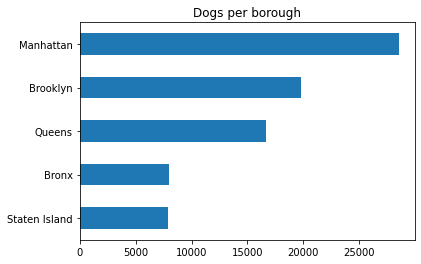

In [322]:
df.OwnerBorough.value_counts().sort_values(ascending=True).plot(kind='barh', title='Dogs per borough')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [323]:
!ls

Dataset TWO - Dogs.ipynb
NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx
boro_population.csv
zipcodes-neighborhoods.csv


In [324]:
df_bpop = pd.read_csv("boro_population.csv")
df_bpop

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [325]:
df = df.merge(df_bpop, left_on='OwnerBorough', right_on='borough')

In [326]:
df = df.drop(columns=['OwnerBorough'])
df.head()

,AnimalName,AnimalGender,PrimaryBreed,SecondaryBreed,AnimalDominantColor,AnimalSecondaryColor,AnimalThirdColor,AnimalBirth,SpayedorNeut,GuardorTrained,Vaccinated,ApplicationDate,LicenseIssuedDate,LicenseExpiredDate,Year,OwnerNeighborhood,OwnerZipCode,borough,population,area_sqmi
0,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,Upper West Side,10024,Manhattan,1644518,23
1,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,Upper West Side,10024,Manhattan,1644518,23
2,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,Upper West Side,10024,Manhattan,1644518,23
3,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,Upper West Side,10024,Manhattan,1644518,23
4,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,Upper West Side,10024,Manhattan,1644518,23


In [327]:
df = df.rename(columns={
    'borough': 'OwnerBorough',
    'population': 'BoroughPopulation',
    'area_sqmi': 'BoroughAreaSqMi'
})
df

,AnimalName,AnimalGender,PrimaryBreed,SecondaryBreed,AnimalDominantColor,AnimalSecondaryColor,AnimalThirdColor,AnimalBirth,SpayedorNeut,GuardorTrained,Vaccinated,ApplicationDate,LicenseIssuedDate,LicenseExpiredDate,Year,OwnerNeighborhood,OwnerZipCode,OwnerBorough,BoroughPopulation,BoroughAreaSqMi
0,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,Upper West Side,10024,Manhattan,1644518,23
1,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,Upper West Side,10024,Manhattan,1644518,23
2,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,Upper West Side,10024,Manhattan,1644518,23
3,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,Upper West Side,10024,Manhattan,1644518,23
4,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,Upper West Side,10024,Manhattan,1644518,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80854,Mack,M,Bullmastiff,NaN,Black,Brown,Brindle,2015-11-01,No,NaN,No,2016-04-15 16:36:20.033,2016-04-15,2017-04-15,2015,Jamaica,11436,Queens,2339150,109
80855,King,M,Yorkshire Terrier Crossbreed,NaN,Gold,NaN,NaN,2014-10-01,Yes,NaN,Yes,2016-04-15 19:53:46.560,2016-04-15,2017-04-15,2014,Jamaica,11436,Queens,2339150,109
80856,WHISKY,M,Shih Tzu,NaN,Brown,White,Gray,2013-09-01,Yes,NaN,Yes,2016-04-20 14:12:32.620,2016-04-20,2017-05-14,2013,Jamaica,11436,Queens,2339150,109
80857,Logan,M,Labrador Retriever Crossbreed,NaN,Black,White,NaN,2014-11-01,Yes,NaN,Yes,2016-04-23 12:12:37.633,2016-04-23,2017-04-25,2014,Jamaica,11436,Queens,2339150,109


In [334]:
df.groupby('OwnerBorough')['BoroughPopulation'].value_counts().sort_values(ascending=False)

OwnerBorough   BoroughPopulation
Manhattan      1644518              28536
Brooklyn       2636735              19786
Queens         2339150              16696
Bronx          1455444               7951
Staten Island  474558                7890
Name: BoroughPopulation, dtype: int64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [425]:
df.groupby(by='OwnerBorough').PrimaryBreed.value_counts()

OwnerBorough   PrimaryBreed                      
Bronx          Unknown                               1121
               Yorkshire Terrier                      753
               Shih Tzu                               682
               Chihuahua                              553
               American Pit Bull Terrier/Pit Bull     442
                                                     ... 
Staten Island  Siberian Husky Crossbreed                1
               St. Bernard                              1
               Standard Schnauzer                       1
               Tibetan Spaniel                          1
               Xoloitzcuintli                           1
Name: PrimaryBreed, Length: 1097, dtype: int64

In [422]:
df.groupby(by='OwnerBorough').PrimaryBreed.value_counts().nlargest(5)

OwnerBorough   PrimaryBreed     
Manhattan      Unknown              4392
Brooklyn       Unknown              3067
Queens         Unknown              2781
Staten Island  Unknown              1404
Manhattan      Yorkshire Terrier    1402
Name: PrimaryBreed, dtype: int64

In [423]:
df.groupby(by='OwnerBorough').PrimaryBreed.value_counts().nlargest(5).to_frame(name='Counts')

,,Counts
OwnerBorough,PrimaryBreed,
Manhattan,Unknown,4392
Brooklyn,Unknown,3067
Queens,Unknown,2781
Staten Island,Unknown,1404
Manhattan,Yorkshire Terrier,1402


In [424]:
df.groupby(by='OwnerBorough').PrimaryBreed.value_counts().nlargest(5).to_frame(name='Counts').reset_index()

,OwnerBorough,PrimaryBreed,Counts
0,Manhattan,Unknown,4392
1,Brooklyn,Unknown,3067
2,Queens,Unknown,2781
3,Staten Island,Unknown,1404
4,Manhattan,Yorkshire Terrier,1402


In [428]:
df.groupby('OwnerBorough').PrimaryBreed.value_counts().groupby(level=0, group_keys=False).nlargest(5).to_frame(name='Counts').reset_index()

<AxesSubplot:title={'center':'Top 5 breeds in each borough'}, ylabel='OwnerBorough,PrimaryBreed'>

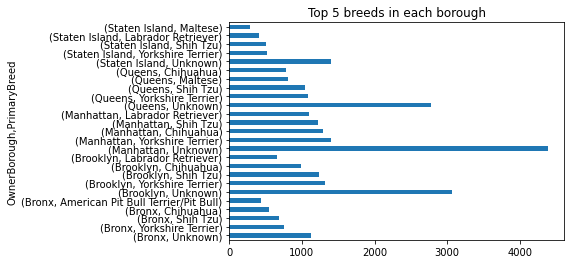

In [431]:
df.groupby('OwnerBorough').PrimaryBreed.value_counts() \
    .groupby(level=0, group_keys=False) \
    .nlargest(5) \
    .plot(kind='barh', title='Top 5 breeds in each borough')

## What percentage of dogs are not guard dogs?

In [275]:
(df.GuardorTrained.value_counts(normalize=True) * 100).round(2)

No     99.94
Yes     0.06
Name: GuardorTrained, dtype: float64